In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import signal
from scipy.fft import fft
from scipy.integrate import simps
import math

In [2]:
#data polled at 20hz
df = pd.read_csv('walk.txt',sep=';',index_col = 'index')

In [3]:
pd.set_option('display.max_rows',0)

In [4]:
#24 was me standing still
#2152
df
#need to multiply by 9.81 to turns Gs into m/s^2

,x,y,z
index,,,
0,-0.149216,0.985901,0.057251
1,-0.140732,0.990067,0.064270
2,-0.142715,0.988174,0.068024
3,-0.139343,0.990250,0.061203
4,-0.141174,0.989868,0.064529
5,-0.141037,0.988922,0.064804
6,-0.135483,0.989090,0.061264
7,-0.139191,0.987167,0.066025
8,-0.140488,0.988098,0.063950


In [5]:
#for the regular walk
df = df[(df.index >24) & (df.index <2152)]
#for fast walk
#df = df[(df.index >24) & (df.index <650)]
df

,x,y,z
index,,,
25,-0.136948,0.990005,0.074142
26,-0.137024,0.997421,0.084290
27,-0.131638,0.994247,0.088394
28,-0.112320,1.005676,0.092255
29,-0.118713,0.995026,0.077759
30,-0.116592,0.992279,0.086182
31,-0.110428,0.990646,0.091171
32,-0.111542,0.983047,0.088593
33,-0.118881,0.988068,0.088440


In [6]:
N= df['x'].size
#x = np.linspace(0.0,N*T,N)
y = df['x'] * 9.81
f = 20 #Frequency in cycles per second or Hertz, oscilliations per second
f_s = 20 #number of measurements per second
x = np.linspace(0,N/f_s,N)

In [7]:
N

2127

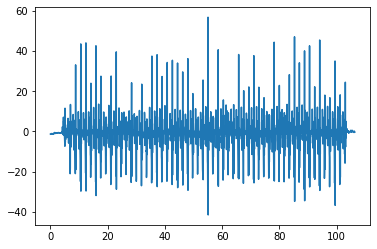

In [8]:
noisyX = plt.plot(x,y)
noisyX

In [29]:
#b,a = signal.butter(3,0.1,btype='lowpass',analog=False)
b,a = signal.butter(3,0.2,btype='lowpass',analog=False)

In [30]:
filt = signal.filtfilt(b,a,y)
filt

array([-1.34429252, -1.29072226, -1.23940404, ..., -0.17712716,
       -0.2589124 , -0.36366225])

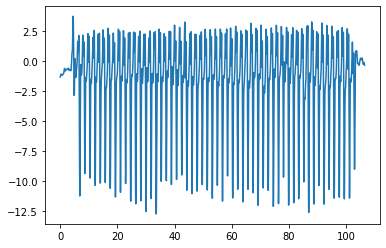

In [31]:
cleanX = plt.plot(x,filt)
cleanX

In [12]:
#Fast Fourier Transform the data
yf = fft(filt)
yf

array([-3276.60523881  -0.j        ,   219.73406507 -44.44543699j,
         210.63868375 -70.43658823j, ...,   214.80770521+164.71144852j,
         210.63868375 +70.43658823j,   219.73406507 +44.44543699j])

In [13]:
#xf = np.linspace(0.0,1.0/(2.0*(T)),N//2)
#xf = np.linspace(0,1/(20*f_s),N//2)
#xf = np.linspace(0,f_s,N//2)
xf = np.linspace(0,N*f_s,N)

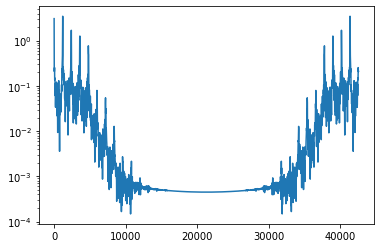

In [14]:
#plt.plot(xf,2.0/N * np.abs(yf[0:N//2]))
#plt.semilogy(xf,2.0/N * np.abs(yf[0:N//2]))
plt.semilogy(xf,2.0/N * np.abs(yf))
plt.show()

In [15]:
from scipy.fft import fftfreq

In [16]:
n = yf.size

In [17]:
#default 1 second
freqs = fftfreq(n)
freqs

array([ 0.        ,  0.00047015,  0.00094029, ..., -0.00141044,
       -0.00094029, -0.00047015])

In [18]:
idx = np.argmax(np.abs(yf))
idx

60

In [19]:
freq = freqs[idx]
freq

0.028208744710860365

In [20]:
stepFreq = abs(freq * f_s)
stepFreq
#half a step per second

0.5641748942172073

In [21]:
#steps/minute
stepFreq * 60

33.850493653032444

In [22]:
timeElapsed = N / f_s
timeElapsed

106.35

In [23]:
numSteps = stepFreq * timeElapsed
numSteps

60.0

In [24]:
df['x'].loc[25:2151].sum() / f_s
#-16 means 16m/s in the negative direction of the accelerometer?

-16.69994615

In [25]:
df['y'].loc[25:2151].sum() / f_s

126.88338445

In [26]:
df['z'].loc[25:2151].sum() / f_s

6.981683049999999